In [ ]:
import nltk
import random
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt_tab')
# Load and parse the positive reviews
positive_reviews = BeautifulSoup(open('/content/drive/MyDrive/positive.review').read(), 'html.parser')
positive_reviews = positive_reviews.findAll('review_text')
# Exploration: Print a few reviews
print("Sample Reviews:")
for review in positive_reviews[:5]:
    print(review.text.strip())
    print()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Sample Reviews:
I purchased this unit due to frequent blackouts in my area and 2 power supplies going bad.  It will run my cable modem, router, PC, and LCD monitor for 5 minutes.  This is more than enough time to save work and shut down.   Equally important, I know that my electronics are receiving clean power.

I feel that this investment is minor compared to the loss of valuable data or the failure of equipment due to a power spike or an irregular power supply.

As always, Amazon had it to me in <2 business days

I ordered 3 APC Back-UPS ES 500s on the recommendation of an employee of mine who used to work at APC. I've had them for about a month now without any problems. They've functioned properly through a few unexpected power interruptions. I'll gladly order more if the need arises.

Pros:
 - Large plug spacing, good for power adapters
 - Simple design
 - Long cord

Cons:
 - No line conditioning (usually an expensive option

Wish the unit had a separate online/offline light.  When

In [ ]:
# Developing Article Spinner
# Create trigrams from the reviews
trigrams = {}

for review in positive_reviews:
    s = review.text.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    for i in range(len(tokens) - 2):
        k = (tokens[i], tokens[i+2])  # (w1, w3) is the key
        if k not in trigrams:
            trigrams[k] = []
        trigrams[k].append(tokens[i+1])  # (w2) is the value

# Create trigram probabilities
trigram_probabilities = {}
for k, words in trigrams.items():
    if len(set(words)) > 1:  # Only when there are different middle words
        d = {}
        n = len(words)
        for w in words:
            if w not in d:
                d[w] = 0
            d[w] += 1
        for w, c in d.items():
            d[w] = float(c) / n
        trigram_probabilities[k] = d

# Randomly sample from trigram probabilities
def random_sample(d):
    r = random.random()
    cumulative = 0
    for w, p in d.items():
        cumulative += p
        if r < cumulative:
            return w


In [ ]:

# Function to generate spin text
def generate_spin_text():
    review = random.choice(positive_reviews)
    s = review.text.lower()
    print("Original Text: ", s)
    tokens = nltk.tokenize.word_tokenize(s)
    for i in range(len(tokens) - 2):
        if random.random() < 0.2:  # 20% chance of replacement
            k = (tokens[i], tokens[i+2])
            if k in trigram_probabilities:
                tokens[i+1] = random_sample(trigram_probabilities[k])
    spin_text = " ".join(tokens).replace(" .", ".").replace(" '", "'").replace(" ,", ",").replace("$ ", "$").replace(" !", "!")
    print("Spin Text: ", spin_text)

# Run the spinner
if __name__ == "__main__":
    generate_spin_text()

Original Text:  
amazon attempted to  extort second payment for undeliverd items claiming they would refund late

Spin Text:  amazon attempted to extort second payment for undeliverd items claiming they would refund late


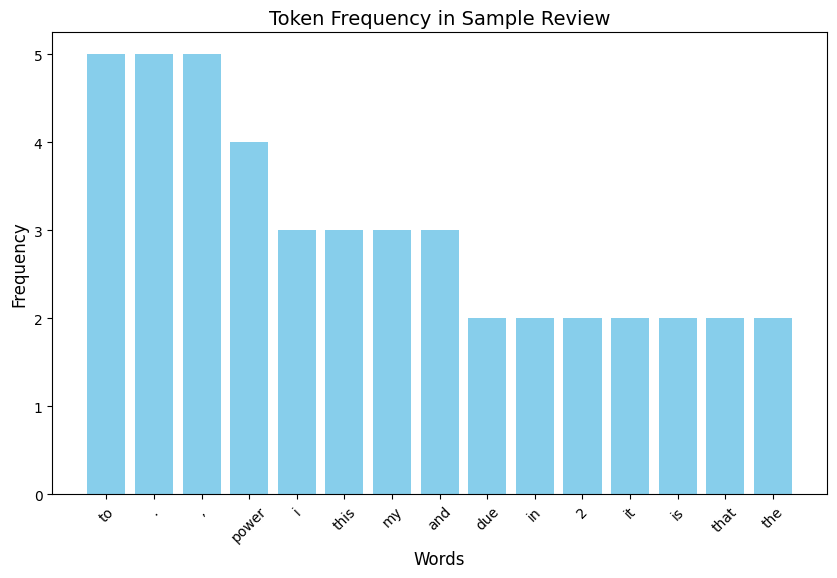

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk

def visualize_tokenization(review_text):
    tokens = nltk.tokenize.word_tokenize(review_text.lower())
    token_counts = Counter(tokens)

    # Sort by frequency
    most_common_tokens = token_counts.most_common(15)  # Top 15 tokens
    words, counts = zip(*most_common_tokens)

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title("Token Frequency in Sample Review", fontsize=14)
    plt.xlabel("Words", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

# Example usage
sample_review = positive_reviews[0].text  # First review in the dataset
visualize_tokenization(sample_review)


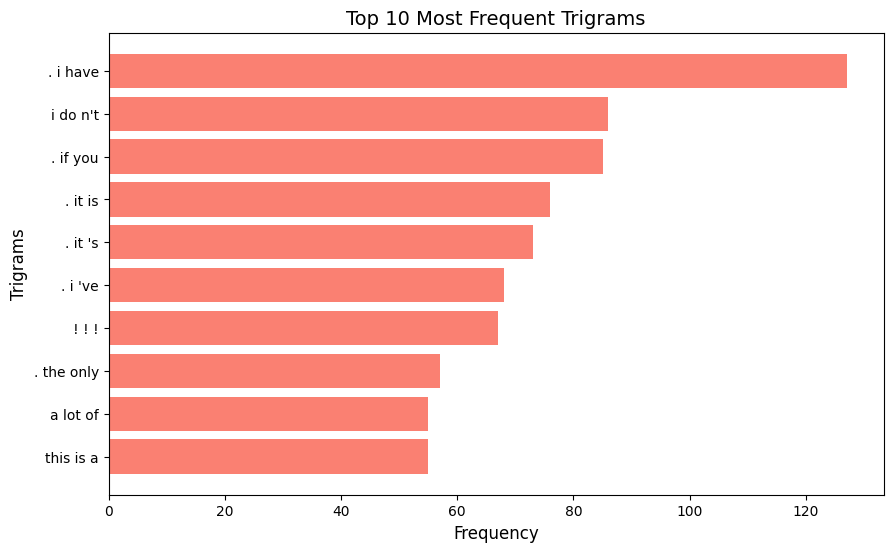

In [ ]:
from collections import Counter

def visualize_trigrams(trigrams):
    trigram_counts = Counter(trigrams)
    most_common_trigrams = trigram_counts.most_common(10)  # Top 10 trigrams
    trigram_texts = [' '.join(trigram) for trigram, _ in most_common_trigrams]
    counts = [count for _, count in most_common_trigrams]

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(trigram_texts, counts, color='salmon')
    plt.title("Top 10 Most Frequent Trigrams", fontsize=14)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Trigrams", fontsize=12)
    plt.gca().invert_yaxis()  # Reverse order for better readability
    plt.show()

# Extract all trigrams from the dataset
all_trigrams = []
for review in positive_reviews:
    tokens = nltk.tokenize.word_tokenize(review.text.lower())
    all_trigrams.extend([(tokens[i], tokens[i+1], tokens[i+2]) for i in range(len(tokens) - 2)])

visualize_trigrams(all_trigrams)


<ipython-input-7-a1715b42585d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probs, y=words, palette="viridis")


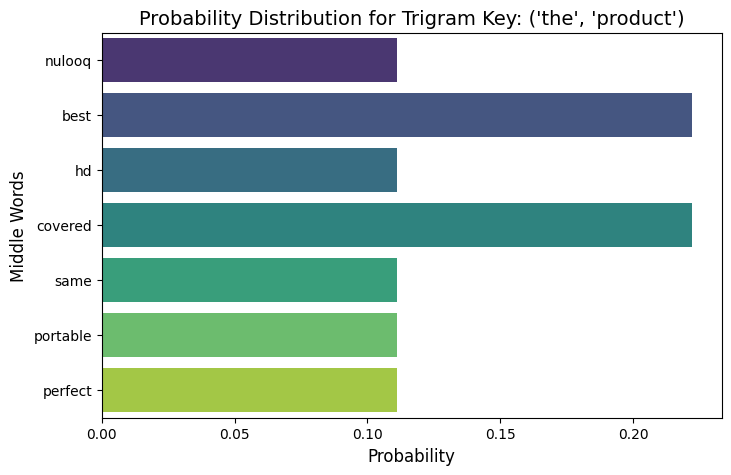

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def visualize_probability_distribution(trigram_key, trigram_probabilities):
    if trigram_key not in trigram_probabilities:
        print("Trigram key not found!")
        return

    probabilities = trigram_probabilities[trigram_key]
    words = list(probabilities.keys())
    probs = list(probabilities.values())

    # Plot probability distribution
    plt.figure(figsize=(8, 5))
    sns.barplot(x=probs, y=words, palette="viridis")
    plt.title(f"Probability Distribution for Trigram Key: {trigram_key}", fontsize=14)
    plt.xlabel("Probability", fontsize=12)
    plt.ylabel("Middle Words", fontsize=12)
    plt.show()

# Example usage
sample_trigram_key = ('the', 'product')  # Choose a sample trigram key
visualize_probability_distribution(sample_trigram_key, trigram_probabilities)


<ipython-input-8-c98e2c796e32>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette="viridis")


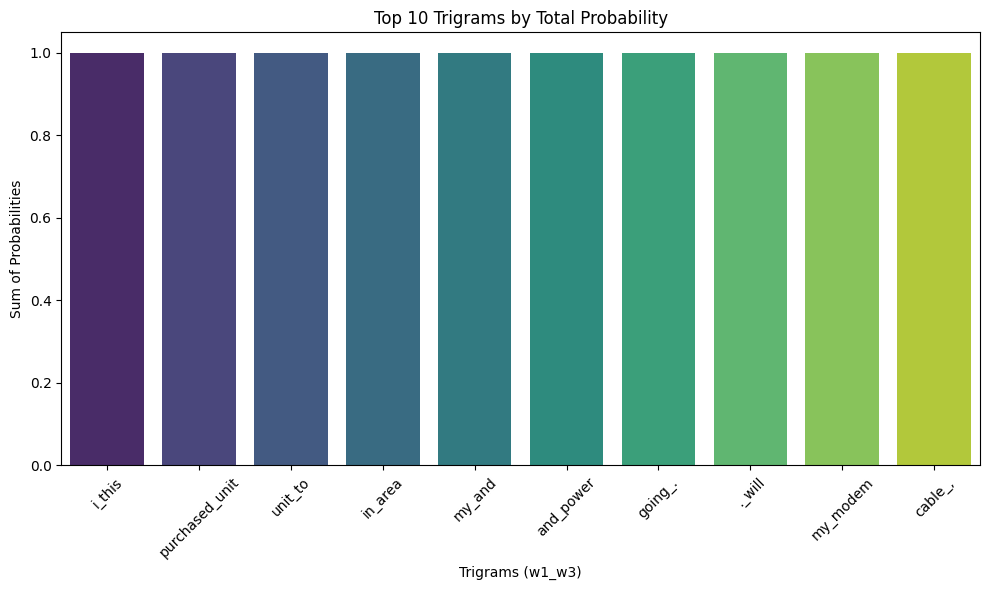

In [ ]:
top_trigrams = list(trigram_probabilities.items())[:10]  # Visualize top 10 trigrams
labels = [f"{k[0]}_{k[1]}" for k, _ in top_trigrams]
values = [sum(v.values()) for _, v in top_trigrams]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, palette="viridis")
plt.title("Top 10 Trigrams by Total Probability")
plt.xlabel("Trigrams (w1_w3)")
plt.ylabel("Sum of Probabilities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()